<a href="https://colab.research.google.com/github/Salva13s/TrabajoPneumonia/blob/main/CNN_a_mano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install medmnist
!pip install --upgrade medmnist
!pip istall tesorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=b183a91fd23c9539e1b69d623c80cbcf188214b7b7f9dd8a1519c686f2b42750
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "istall" - maybe you meant "install"


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import medmnist
from medmnist import INFO, Evaluator
from medmnist import PneumoniaMNIST

In [3]:
data_flag = 'pneumoniamnist'

download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [4]:

# load the data
train_dataset = PneumoniaMNIST(split='train',  download=download)
test_dataset = PneumoniaMNIST(split='test',  download=download)
val_dataset = PneumoniaMNIST(split="val", download=download)


100%|██████████| 4170669/4170669 [00:00<00:00, 5183005.69it/s]


Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


In [5]:
train_images = train_dataset.imgs
train_labels = train_dataset.labels
test_images = test_dataset.imgs
test_labels = test_dataset.labels

In [6]:
print("etiquetas de train set: ",train_labels.shape)
print("-----------------------")
print("imagenes de train set: ",train_images.shape)
print("-----------------------")
print("etiquetas de test set: ",test_labels.shape)
print("-----------------------")
print("etiquetas de test set: ",test_images.shape)

etiquetas de train set:  (4708, 1)
-----------------------
imagenes de train set:  (4708, 28, 28)
-----------------------
etiquetas de test set:  (624, 1)
-----------------------
etiquetas de test set:  (624, 28, 28)


In [7]:
class_names = ["normal", "pneumonia"]

In [8]:
train_labels2 = train_labels.flatten()
print(train_labels2)

[1 1 1 ... 1 0 1]


In [9]:
test_labels2 = test_labels.flatten()
print(test_labels2)

[1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1
 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 1 0 

In [10]:
train_labels3 = np.array(train_labels2)
test_labels3 = np.array(test_labels2)

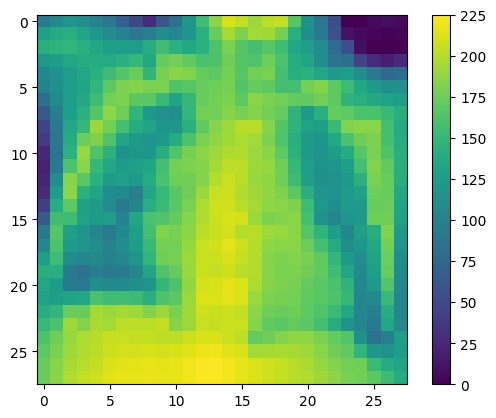

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
test_images[0]

array([[ 62,  19,  15,  42,  54,  74, 113, 138, 153, 153, 154, 156, 160,
        163, 159, 154, 155, 153, 116,  79,  73,  67,  61,  70,  63,  57,
         46,  37],
       [ 62,  32,  33,  54,  60,  75, 104, 121, 146, 146, 145, 145, 148,
        152, 150, 145, 133, 126,  96,  76,  84,  83,  73,  76,  83,  73,
         60,  48],
       [ 67,  60,  73,  94, 103, 113, 125, 128, 150, 150, 148, 145, 148,
        152, 149, 142, 140, 135, 121, 116, 121, 111,  97,  97,  98,  87,
         72,  61],
       [ 63,  68,  81,  98, 115, 133, 143, 142, 156, 160, 159, 156, 157,
        159, 152, 141, 126, 131, 138, 145, 140, 120, 102,  99,  95,  84,
         72,  68],
       [ 78,  86,  90,  95, 114, 133, 141, 141, 152, 160, 163, 161, 161,
        161, 149, 133, 100, 105, 123, 145, 150, 138, 117,  99,  84,  72,
         64,  66],
       [ 92, 116, 128, 131, 137, 131, 116, 112, 145, 157, 165, 163, 165,
        166, 152, 132, 106,  97, 107, 131, 151, 158, 137, 100,  80,  65,
         56,  59],
       [ 9

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
test_images[0]

array([[0.24313725, 0.0745098 , 0.05882353, 0.16470588, 0.21176471,
        0.29019608, 0.44313725, 0.54117647, 0.6       , 0.6       ,
        0.60392157, 0.61176471, 0.62745098, 0.63921569, 0.62352941,
        0.60392157, 0.60784314, 0.6       , 0.45490196, 0.30980392,
        0.28627451, 0.2627451 , 0.23921569, 0.2745098 , 0.24705882,
        0.22352941, 0.18039216, 0.14509804],
       [0.24313725, 0.1254902 , 0.12941176, 0.21176471, 0.23529412,
        0.29411765, 0.40784314, 0.4745098 , 0.57254902, 0.57254902,
        0.56862745, 0.56862745, 0.58039216, 0.59607843, 0.58823529,
        0.56862745, 0.52156863, 0.49411765, 0.37647059, 0.29803922,
        0.32941176, 0.3254902 , 0.28627451, 0.29803922, 0.3254902 ,
        0.28627451, 0.23529412, 0.18823529],
       [0.2627451 , 0.23529412, 0.28627451, 0.36862745, 0.40392157,
        0.44313725, 0.49019608, 0.50196078, 0.58823529, 0.58823529,
        0.58039216, 0.56862745, 0.58039216, 0.59607843, 0.58431373,
        0.55686275, 0.5490

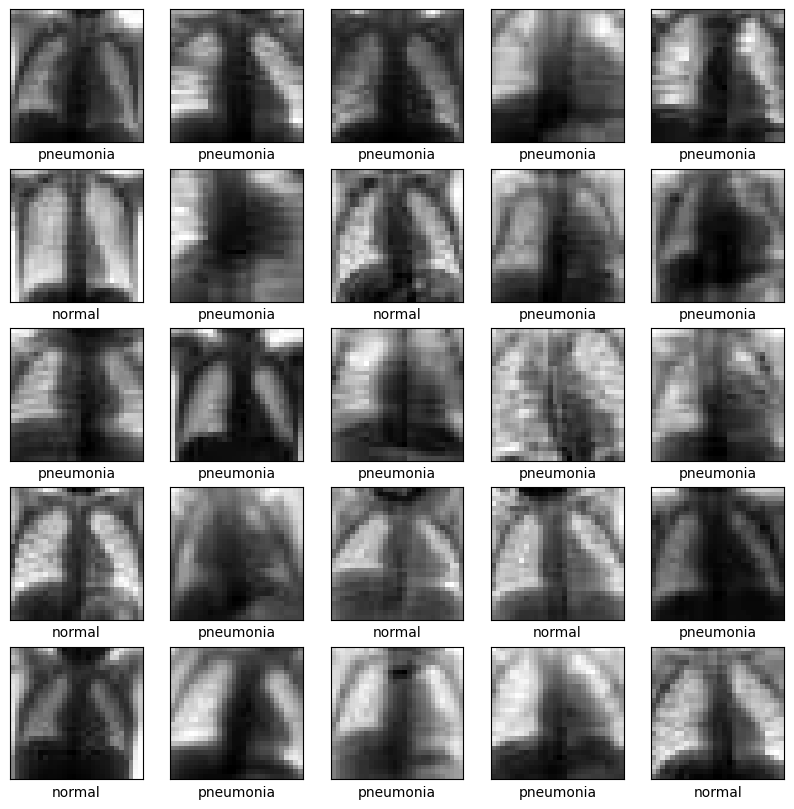

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels3[i]])
plt.show()

##Creacion de modelo de red neuroanl convolucional##

In [37]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crear el modelo secuencial
model = Sequential()

# Agregar la capa de convolución
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Agregar la capa de agrupación
model.add(MaxPooling2D(pool_size=(2, 2)))

# Agregar otra capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))

# Agregar otra capa de agrupación
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar los mapas de características
model.add(Flatten())

# Agregar una capa totalmente conectada
model.add(Dense(64, activation='relu'))

# Agregar la capa de salida con activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))


# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',"AUC","binary_accuracy","TruePositives","TrueNegatives","FalsePositives","FalseNegatives"])


In [38]:
# Entrenar el modelo
H = model.fit(train_images, train_labels3, batch_size=32, epochs=10, validation_data=(test_images, test_labels3))


Epoch 1/10
148/148 [==============================] - 4s 11ms/step - loss: 0.3629 - accuracy: 0.8360 - auc: 0.8857 - binary_accuracy: 0.8360 - true_positives: 3358.0000 - true_negatives: 578.0000 - false_positives: 636.0000 - false_negatives: 136.0000 - val_loss: 0.3963 - val_accuracy: 0.8317 - val_auc: 0.9287 - val_binary_accuracy: 0.8317 - val_true_positives: 374.0000 - val_true_negatives: 145.0000 - val_false_positives: 89.0000 - val_false_negatives: 16.0000
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 0.1861 - accuracy: 0.9261 - auc: 0.9724 - binary_accuracy: 0.9261 - true_positives: 3337.0000 - true_negatives: 1023.0000 - false_positives: 191.0000 - false_negatives: 157.0000 - val_loss: 0.3700 - val_accuracy: 0.8558 - val_auc: 0.9283 - val_binary_accuracy: 0.8558 - val_true_positives: 372.0000 - val_true_negatives: 162.0000 - val_false_positives: 72.0000 - val_false_negatives: 18.0000
Epoch 3/10
148/148 [==============================] - 1s 7ms/step - 

In [39]:
import matplotlib.pyplot as plt
history_dict = H.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'accuracy', 'auc', 'binary_accuracy', 'true_positives', 'true_negatives', 'false_positives', 'false_negatives', 'val_loss', 'val_accuracy', 'val_auc', 'val_binary_accuracy', 'val_true_positives', 'val_true_negatives', 'val_false_positives', 'val_false_negatives'])
{'loss': [0.36289119720458984, 0.1861329823732376, 0.15745152533054352, 0.1493297815322876, 0.13105696439743042, 0.11672093719244003, 0.11172205209732056, 0.09953615069389343, 0.10267449915409088, 0.09359962493181229], 'accuracy': [0.8360238075256348, 0.9260832667350769, 0.9381903409957886, 0.9418011903762817, 0.9498725533485413, 0.9539082646369934, 0.9575191140174866, 0.9636788368225098, 0.9594307541847229, 0.963466465473175], 'auc': [0.8856967091560364, 0.9724067449569702, 0.9800357818603516, 0.981765866279602, 0.9861478209495544, 0.9887028932571411, 0.9895281791687012, 0.991578221321106, 0.9914881587028503, 0.9925206303596497], 'binary_accuracy': [0.8360238075256348, 0.9260832667350769, 0.938190340995788

In [94]:
print("Perdida en set de entrenamiento",history_dict["loss"][len(history_dict["loss"])-1])
print("Perdida en set de testeo",history_dict["val_loss"][len(history_dict["val_loss"])-1])
print("------------------------------------------------------------------------------------")
print("Accuracy en set de entrenamiento",history_dict["accuracy"][len(history_dict["accuracy"])-1])
print("Accuracy en set de testeo",history_dict["val_accuracy"][len(history_dict["val_accuracy"])-1])
print("------------------------------------------------------------------------------------")
print("Auc en set de entrenamiento",history_dict["auc"][len(history_dict["auc"])-1])
print("Auc en set de testeo",history_dict["val_auc"][len(history_dict["val_auc"])-1])
print("------------------------------------------------------------------------------------")
print("Binary_accuracy en set de entrenamiento",history_dict["binary_accuracy"][len(history_dict["binary_accuracy"])-1])
print("Binary_accuracy en set de testeo",history_dict["val_binary_accuracy"][len(history_dict["val_binary_accuracy"])-1])

Perdida en set de entrenamiento 0.09359962493181229
Perdida en set de testeo 0.46278783679008484
------------------------------------------------------------------------------------
Accuracy en set de entrenamiento 0.963466465473175
Accuracy en set de testeo 0.8589743375778198
------------------------------------------------------------------------------------
Auc en set de entrenamiento 0.9925206303596497
Auc en set de testeo 0.9294652342796326
------------------------------------------------------------------------------------
Binary_accuracy en set de entrenamiento 0.963466465473175
Binary_accuracy en set de testeo 0.8589743375778198


In [95]:
print("Verdaderos negativos set entrenamiento: ",history_dict["true_negatives"][len(history_dict["true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos negativos set de testeo: ",history_dict["val_true_negatives"][len(history_dict["val_true_negatives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set entrenamiento: ",history_dict["true_positives"][len(history_dict["true_positives"])-1])
print("------------------------------------------------")
print("Verdaderos positivos set de testeo: ",history_dict["val_true_positives"][len(history_dict["val_true_positives"])-1])
print("------------------------------------------------")
print("Falsos negativos set entrenamiento: ",history_dict["false_negatives"][len(history_dict["false_negatives"])-1])
print("------------------------------------------------")
print("Falsos negativos set de testeo: ",history_dict["val_false_negatives"][len(history_dict["val_false_negatives"])-1])
print("------------------------------------------------")
print("Falsos positivos set entrenamiento: ",history_dict["false_positives"][len(history_dict["false_positives"])-1])
print("------------------------------------------------")
print("Falsos positivos set de testeo: ",history_dict["val_false_positives"][len(history_dict["val_false_positives"])-1])

Verdaderos negativos set entrenamiento:  1120.0
------------------------------------------------
Verdaderos negativos set de testeo:  159.0
------------------------------------------------
Verdaderos positivos set entrenamiento:  3416.0
------------------------------------------------
Verdaderos positivos set de testeo:  377.0
------------------------------------------------
Falsos negativos set entrenamiento:  78.0
------------------------------------------------
Falsos negativos set de testeo:  13.0
------------------------------------------------
Falsos positivos set entrenamiento:  94.0
------------------------------------------------
Falsos positivos set de testeo:  75.0


<Figure size 640x480 with 0 Axes>

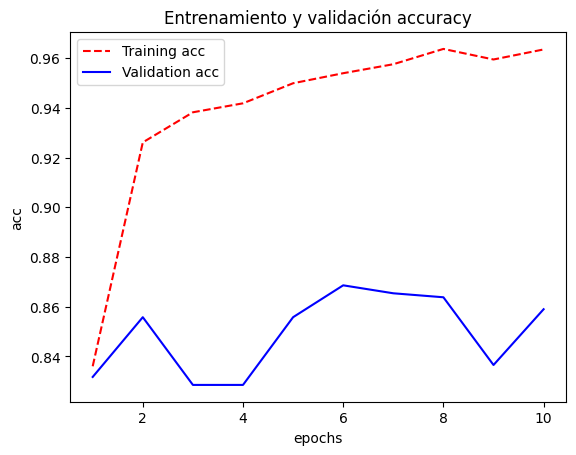

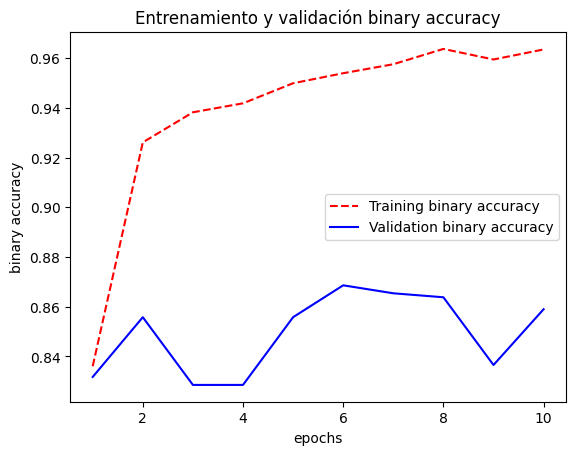

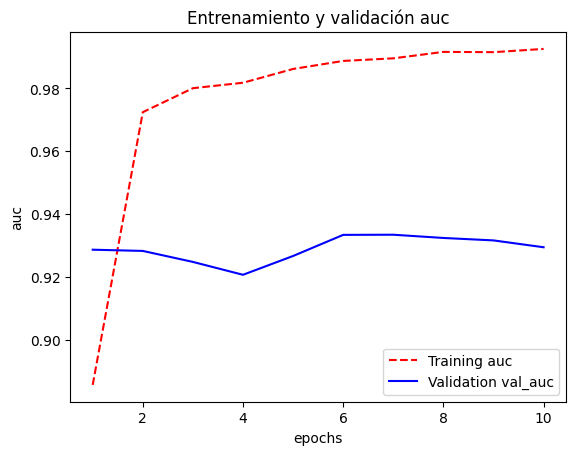

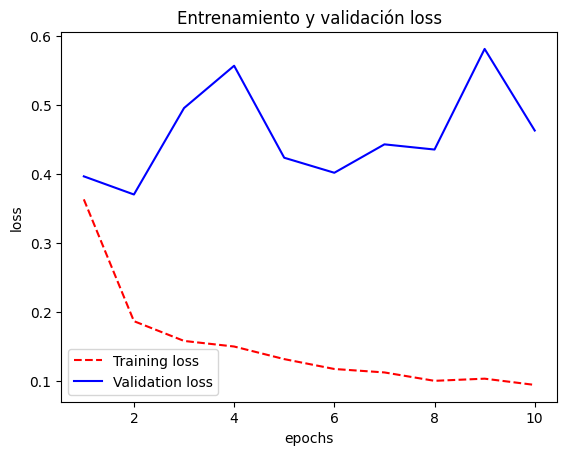

<Figure size 640x480 with 0 Axes>

In [90]:
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]
auc = H.history["auc"]
val_auc = H.history['val_auc']
binary_accuracy = H.history['binary_accuracy']
val_binary_accuracy = H.history["val_binary_accuracy"]

epochs   = range(1,len(acc)+1,1)



plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Entrenamiento y validación accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     binary_accuracy, 'r--', label='Training binary accuracy'  )
plt.plot ( epochs, val_binary_accuracy,  'b', label='Validation binary accuracy')
plt.title ('Entrenamiento y validación binary accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     auc, 'r--', label='Training auc'  )
plt.plot ( epochs, val_auc,  'b', label='Validation val_auc')
plt.title ('Entrenamiento y validación auc')
plt.ylabel('auc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' , label='Training loss'  )
plt.plot ( epochs, val_loss ,  'b', label='Validation loss' )
plt.title ('Entrenamiento y validación loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [22]:
predictions = model.predict(test_images)

20/20 [==============================] - 0s 2ms/step


In [23]:
X = 3
print("Predccion del modelo: ", predictions[X])
print("Etiqueta real: ",test_labels3[X])

Predccion del modelo:  [0.00446927]
Etiqueta real:  0


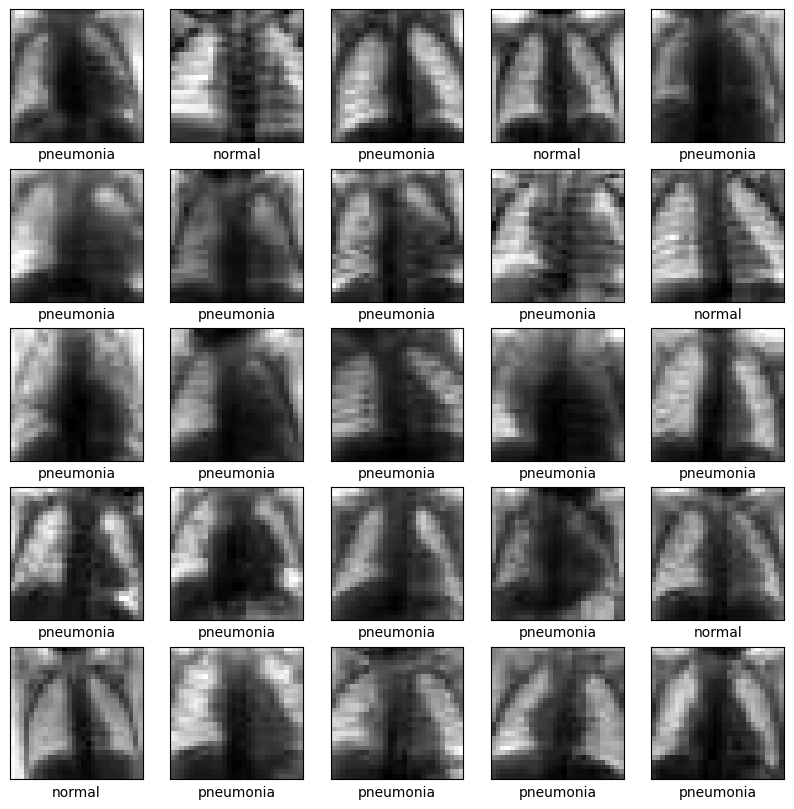

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels3[i]])
plt.show()

In [69]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i][0], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = {"Prediccion ": (round(predictions_array, 3)), "Etiqueta real ": true_label}
    plt.xlabel(predicted_label)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i][0], true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    yticks = ['0', '1']
    y = [0, 1]
    plt.yticks(y, yticks)

    plt.subplots_adjust(right=1.0)
    thisplot = plt.bar("Predicción", predictions_array, color ="purple" )
    for bar in thisplot:
      bar.set_width(0.85)
    plt.xlim(-1, 0.5)
    plt.axhline(y=1.0, color="black", linestyle="--")


20/20 [==============================] - 0s 3ms/step


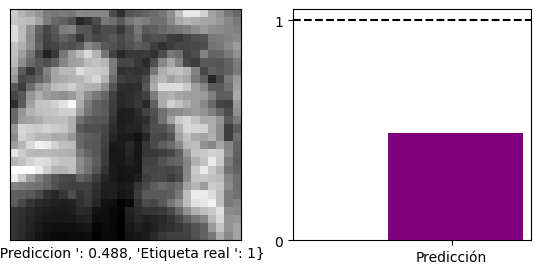

In [80]:
i = 88
predictions = model.predict(test_images)  # Realiza predicciones en los datos de prueba

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels3, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels3)
plt.show()

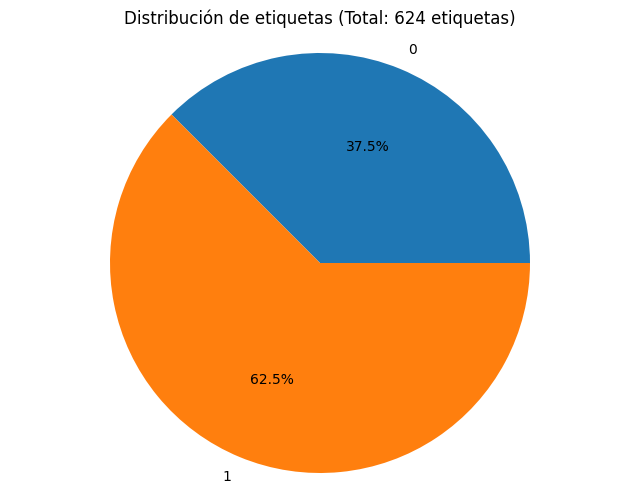

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(test_labels3, return_counts=True)
total_labels = len(test_labels3)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()


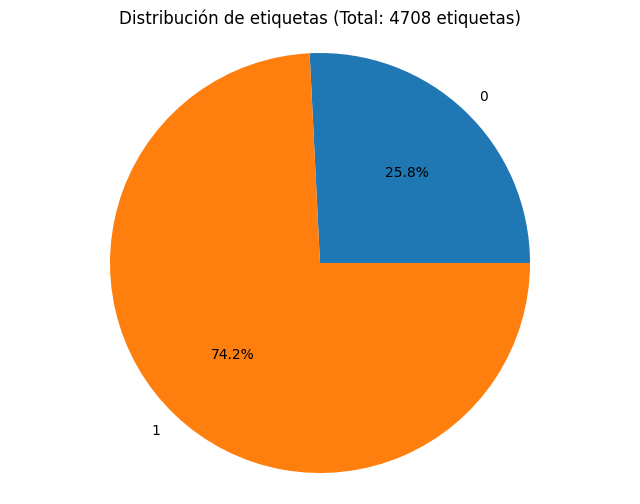

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la cantidad de imágenes por etiqueta
unique_labels, label_counts = np.unique(train_labels3, return_counts=True)
total_labels = len(train_labels3)  # Cantidad total de etiquetas

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%')
plt.title(f'Distribución de etiquetas (Total: {total_labels} etiquetas)')
plt.axis('equal')
plt.show()

